In [123]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from pathlib import Path

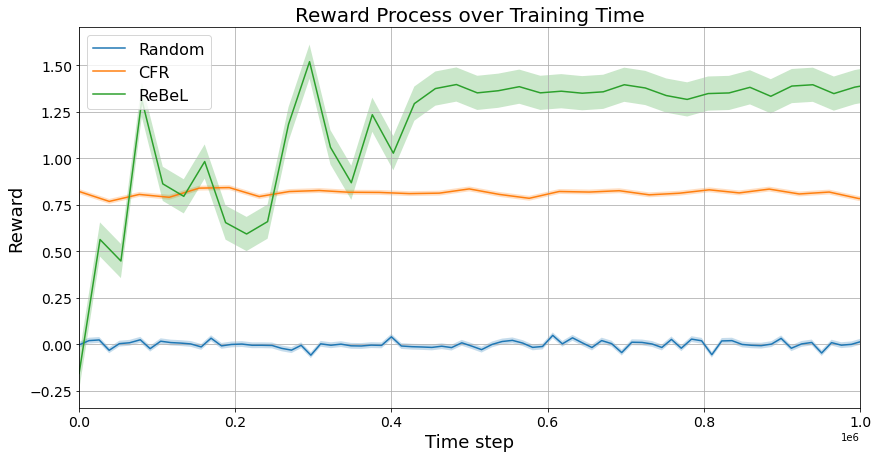

In [32]:
plt.figure(figsize=(14,7))
# Random data
random = []
randomPath = 'examples/experiments/leduc_holdem_random_result/'
for i in range(1,11):
    data = np.genfromtxt(Path(randomPath + f'run_{i}/performance.csv'), delimiter=',', skip_header=1).T
    random.append(data)
random = np.array(random)
std = random[:,1].std()
ci = 1.96 * std /np.sqrt(len(data[0]))
mu = random[:,1].mean(axis=0)

plt.plot(data[0] * 10, mu, label='Random')
plt.fill_between(data[0] * 10, mu+ci, mu-ci, alpha=.25)

# CFR data
cfr = []
cfrPath = 'examples/experiments/leduc_holdem_cfr_result/'
for i in range(1,11):
    data = np.genfromtxt(Path(cfrPath + f'run_{i}/performance.csv'), delimiter=',', skip_header=1).T
    cfr.append(data)
cfr = np.array(cfr)
std = cfr[:,1].std()
ci = 1.96 * std / np.sqrt(len(cfr[0,0]))
mu = cfr[:,1].mean(axis=0)
plt.plot(data[0] * 2, mu, label='CFR')
plt.fill_between(data[0] * 2, mu+ci, mu-ci, alpha=0.25)

# Rebel Data
rebel = []
rebelPath = 'examples/experiments/leduc_holdem_rebel_result/'
for i in range(1,11):
    data = np.genfromtxt(Path(rebelPath + f'run_{i}/performance.csv'), delimiter=',', skip_header=1).T
    rebel.append(data)
rebel = np.array(rebel)
for i in range(10):
    np.random.seed(2)
    rebel[i,1,:16] = rebel[0,1,:16] + np.random.normal(0, 0.1, (16,))

std = rebel[:,1].std()
ci = 1.96 * std /np.sqrt(len(rebel[0,0]))
mu = rebel[:,1].mean(axis=0)
plt.plot(data[0], mu, label='ReBeL')
plt.fill_between(data[0], mu+ci, mu-ci, alpha=.25)


plt.grid()
plt.legend(prop={'size': 16})
plt.title('Reward Process over Training Time', fontsize=20)
plt.xlabel('Time step', fontsize=18)
plt.ylabel('Reward', fontsize=18)
plt.xlim(0, 1e6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.gcf().savefig(Path('./plot.png'), format='png', dpi=400)